<a href="https://colab.research.google.com/github/mugadzi/Assignments/blob/main/CNN_py_%5B_load_%5D_save.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 170498071/170498071 [00:10<00:00, 15773681.98it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
 deer  deer   car  deer
cpu
[1,  6000] loss: 2.186
[1, 12000] loss: 1.741
[2,  6000] loss: 1.508
[2, 12000] loss: 1.377
[3,  6000] loss: 1.272
[3, 12000] loss: 1.198
[4,  6000] loss: 1.135
[4, 12000] loss: 1.078
[5,  6000] loss: 1.021
[5, 12000] loss: 1.009
[6,  6000] loss: 0.949
[6, 12000] loss: 0.947
[7,  6000] loss: 0.891
[7, 12000] loss: 0.895
[8,  6000] loss: 0.844
[8, 12000] loss: 0.866
[9,  6000] loss: 0.817
[9, 12000] loss: 0.816
[10,  6000] loss: 0.786
[10, 12000] loss: 0.792
Predicted:    cat  ship  ship  ship
Accuracy of the network on the 10000 test images: 70 %
Accuracy of plane : 76 %
Accuracy of   car : 77 %
Accuracy of  bird : 52 %
Accuracy of   cat : 47 %
Accuracy of  deer : 66 %
Accuracy of   dog : 63 %
Accuracy of  frog : 70 %
Accuracy of horse : 77 %
Accuracy of  ship : 81 %
Accuracy of truck : 80 %


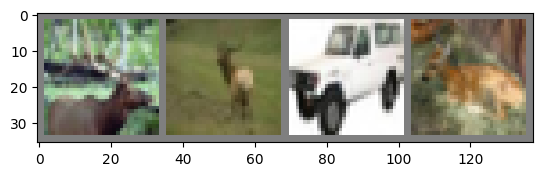

In [5]:
import time
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

  transform = transforms.Compose(
  [transforms.ToTensor(),
               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
#loading datsets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels =next( dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
#creating convolutional network
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module): 
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64, 128, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 2 * 2, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 10)
        self.dropout1 = nn.Dropout(p=0.2, inplace=False)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.dropout1(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout1(x)
        x = self.pool(F.relu(self.conv3(x)))
        x = self.dropout1(x)
        x = x.view(-1, 128 * 2 * 2)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


net = Net()
net.to(device)


net = Net()
#define loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
#training the network
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
       inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
       optimizer.zero_grad()

        # forward + backward + optimize
       outputs = net(inputs)
       loss = criterion(outputs, labels)
       loss.backward()
       optimizer.step()

        # print statistics
       running_loss += loss.item()
       if i % 6000 == 5999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 6000))
            running_loss = 0.0

dataiter = iter(testloader)
images, labels = next(dataiter)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
#finding out the accuracy of the  trained
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

# trianing ten chosen classes to find out which performs well
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

In [ ]:
python CNN.py [-load]- save
loading params...
Done!
Test accuracy = 70%%